[nltk_data] Downloading package vader_lexicon to C:\Users\Archies
[nltk_data]     Gurav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Archies
[nltk_data]     Gurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Archies
[nltk_data]     Gurav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Archies
[nltk_data]     Gurav\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


First few rows of the dataset:
                                         ProductName     Price Rate  \
0  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
1  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    5   
2  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   
3  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    1   
4  Candes 12 L Room/Personal Air Cooler?ÿ?ÿ(White...  ??3,999    3   

            Review                                            Summary  
0           Super!  Great cooler.. excellent air flow and for this...  
1          Awesome             Best budget 2 fit cooler. Nice cooling  
2             Fair  The quality is good but the power of air is de...  
3  Useless product                 Very bad product it's a only a fan  
4             Fair                                      Ok ok product  

Dataset summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189874 entries, 0 to 189873
Data columns (

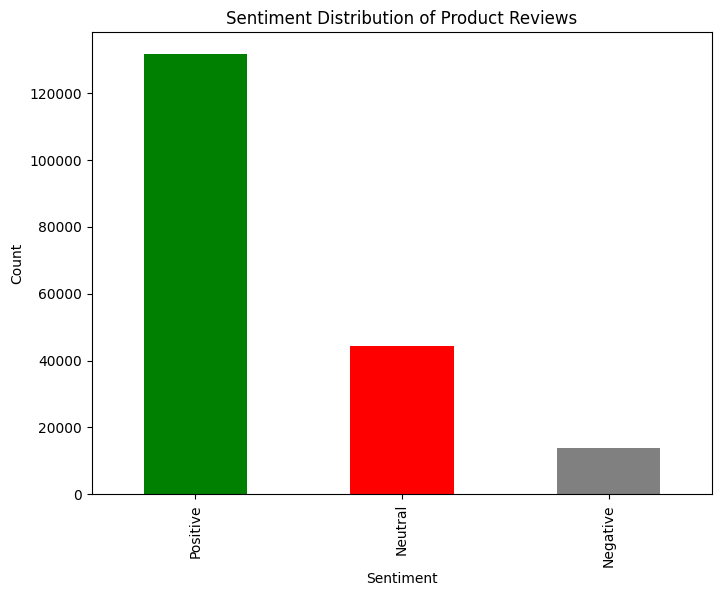

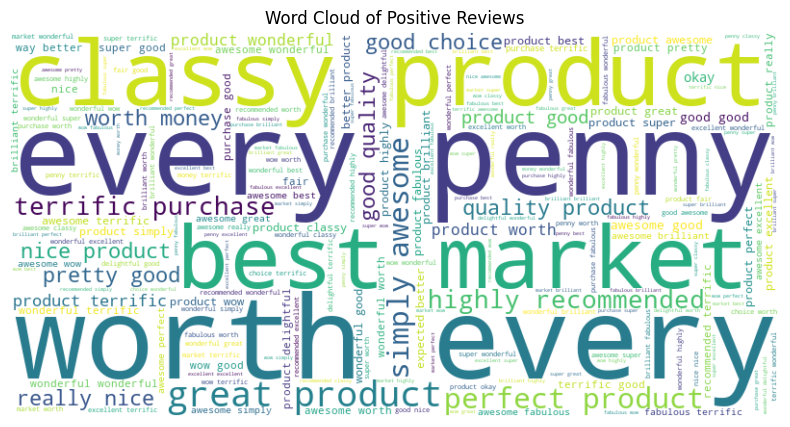


Sentiment analysis complete and results visualized.


In [9]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

# Load the dataset
file_path = './Dataset/flipkart_product.csv'
# Try different encodings if UTF-8 doesn't work
try:
    data = pd.read_csv(file_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Display summary information about the dataset
print("\nDataset summary:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset statistics:")
print(data.describe())

# Handle missing values by replacing NaN with empty strings
data['Review'] = data['Review'].fillna('')

# Preprocess text data
def preprocess_text(text):
    if isinstance(text, str):
        # Tokenization
        tokens = word_tokenize(text.lower())

        # Remove punctuation and stopwords
        tokens = [word for word in tokens if word.isalnum()]
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

        return ' '.join(tokens)
    else:
        return ''

# Apply preprocessing
data['cleaned_reviews'] = data['Review'].apply(preprocess_text)

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Perform sentiment analysis
data['sentiment_scores'] = data['cleaned_reviews'].apply(sia.polarity_scores)
data['compound'] = data['sentiment_scores'].apply(lambda x: x['compound'])
data['sentiment'] = data['compound'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))

# Visualize the sentiment distribution
plt.figure(figsize=(8, 6))
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution of Product Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Generate a word cloud of positive reviews
positive_reviews = ' '.join(data[data['sentiment'] == 'Positive']['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Reviews')
plt.show()

print("\nSentiment analysis complete and results visualized.")